In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler
%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf


In [2]:
tree_reg = joblib.load("tree_regressor.pkl")
forest_reg = joblib.load("forest_regressor.pkl")
opt_forest = joblib.load("optimized_forest_regressor.pkl")
rnd_reg = joblib.load("_randomly_optimized_forest_regressor.pkl")
poly_tree = joblib.load("poly_tree_regressor.pkl")
poly_forest = joblib.load("poly_forest_regressor.pkl")

In [3]:
totaldf.insert(5,'tree μ', totaldf.μob*(np.exp(np.power(tree_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(6,'forest μ', totaldf.μob*(np.exp(np.power(forest_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(7,'grid forest μ', totaldf.μob*(np.exp(np.power(opt_forest.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'rand forest μ', totaldf.μob*(np.exp(np.power(rnd_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'poly tree μ', totaldf.μob*(np.exp(np.power(poly_tree.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(10,'poly forest μ', totaldf.μob*(np.exp(np.power(poly_forest.predict(X_features_poly[2]),2)) -0.0012))

In [4]:
totaldf

,Pb,P,ΔP,μob,μ,tree μ,forest μ,grid forest μ,rand forest μ,poly tree μ,poly forest μ
0,2200.290403,2200.290403,0.000000,0.998694,0.998694,0.998694,0.998694,0.998694,0.998694,0.998694,0.998694
1,2200.290403,2348.433431,148.143028,0.998694,1.007933,1.032823,1.014654,1.014172,1.015880,1.009603,1.014841
2,2200.290403,2496.576459,296.286056,0.998694,1.017506,1.031437,1.028478,1.029591,1.033430,1.065035,1.027892
3,2200.290403,2644.719487,444.429084,0.998694,1.027358,1.039737,1.048044,1.041233,1.040452,1.095649,1.039773
4,2200.290403,2792.862515,592.572112,0.998694,1.037444,1.014298,1.043342,1.045952,1.043725,1.021886,1.050859
...,...,...,...,...,...,...,...,...,...,...,...
15,3910.215923,5560.049012,1649.833090,0.125504,0.155127,0.151276,0.153431,0.157636,0.159330,0.164566,0.158308
16,3910.215923,5670.037885,1759.821962,0.125504,0.157137,0.149171,0.155452,0.156056,0.158167,0.156295,0.154752
17,3910.215923,5780.026758,1869.810835,0.125504,0.159150,0.153640,0.159312,0.161150,0.156985,0.169950,0.161826
18,3910.215923,5890.015630,1979.799708,0.125504,0.161165,0.173553,0.163465,0.164250,0.163008,0.173553,0.163580


In [18]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(6):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Decision Tree ','Random Forest','Grid optimized forest','Random  Grid optimized forest','Decision Tree polynomial features','Random Forest polynomial features'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Decision Tree,0.522096,7.551826,4.659076,5.966211
Random Forest,-0.037913,4.657000,2.925137,3.623901
Grid optimized forest,0.089222,4.662410,2.936633,3.622459
Random Grid optimized forest,0.072228,4.687803,2.941814,3.650540
Decision Tree polynomial features,0.803338,7.841525,4.830126,6.229346
Random Forest polynomial features,0.089883,4.742598,2.988028,3.684020


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,0.862323,6.457476,3.882039,8.164562
forest,0.443203,3.530489,2.348335,4.172906
grid optimized forest,0.549906,3.518652,2.347028,4.336040
random optimized forest,0.540083,3.491876,2.343614,4.314952
polynomial tree,1.179659,7.082163,4.119797,8.155823
polynomial forest,0.562907,3.659518,2.435988,4.238385


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,-0.582931,9.054241,5.699887,95.731393
forest,-1.322613,6.176903,4.014666,83.671981
grid optimized forest,-1.209587,6.286860,4.061150,85.172310
random optimized forest,-1.231652,6.333924,4.068019,86.610870
polynomial tree,-0.323110,8.751625,5.612118,87.916833
polynomial forest,-1.218111,6.203141,4.010900,83.800353


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,0.478491,8.400323,5.824885,250.252138
forest,-0.351405,5.540530,3.576742,173.206945
grid optimized forest,0.215090,5.582608,3.787362,163.759853
random optimized forest,0.081606,5.684735,3.808652,168.584921
polynomial tree,0.290465,8.427164,5.972909,260.117764
polynomial forest,-0.268132,5.465858,3.510432,176.634224


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
tree,1.762680,9.886348,7.274671,1544.293203
forest,0.819994,5.380025,3.668411,879.580877
grid optimized forest,0.258990,4.873062,3.194893,797.438482
random optimized forest,0.447118,5.065981,3.274343,829.845197
polynomial tree,2.773303,10.228472,7.951346,1601.309086
polynomial forest,1.295332,5.787014,4.049711,941.803389


Text(0, 0.5, '% Average Absolute Error')

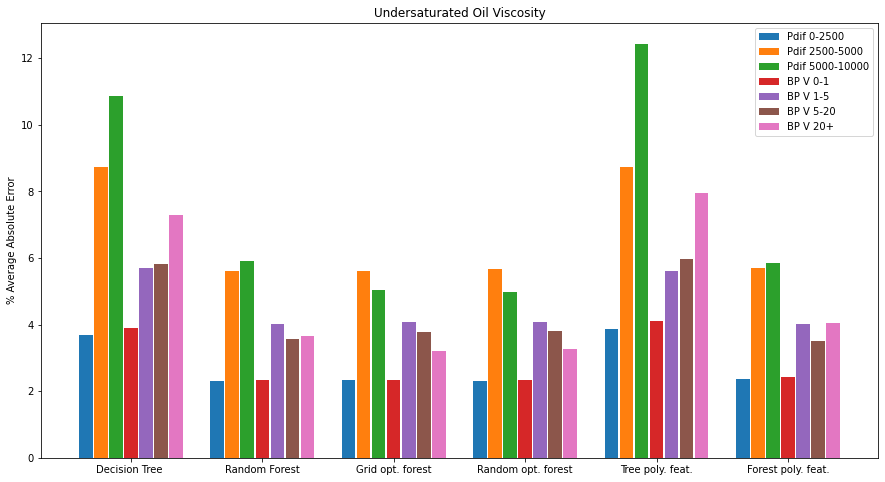

In [19]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models = ['Decision Tree ','Random Forest','Grid opt. forest','Random opt. forest','Tree poly. feat.','Forest poly. feat.']



%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(6), models)
plt.title('Undersaturated Oil Viscosity')
plt.ylabel("% Average Absolute Error")